ELIGIBILITY PREDICTION USING MACHINE LEARNING

We will first import the necessary libraries and import the dataset that we clean using Power BI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
dataset=pd.read_excel("C:/Users/roton/OneDrive - belgiumcampus.ac.za/Third year/BIN 381/Project/Group_Project_BIN381_Milestone_3/Data2.xlsx") # change the file path
dataset.head()

,Annual.Salary,Gross.Pay.Last.Paycheck,Gross.Year.To.Date,Gross.Year.To.Date...FRS.Contribution,Year_of_Birth,Postal_Code,Country_ID,Married,Unknown,Single,...,City_Wuppertal,City_Wymondham,City_Yokohama,City_Zaandam,City_Zaanstad,City_Zandvoort,City_Zeist,City_Zoetermeer,Age,Eligibility
0,54619.76,4908.74,56911.23,55235.75,1957,72059,52790,1,0,0,...,0,0,0,0,0,0,0,0,66,Yes
1,48119.24,1963.02,22161.98,21508.64,1985,55787,52790,0,1,0,...,0,0,0,0,0,0,0,0,38,No
2,52348.66,2056.87,52377.08,50860.20,1963,58488,52790,1,0,0,...,0,0,0,0,0,0,0,0,60,Yes
3,94012.10,6496.36,105830.24,102724.47,1986,45704,52790,0,1,0,...,0,0,0,0,0,0,0,0,37,Yes
4,52380.64,2876.63,59290.64,57543.80,1983,75603,52790,1,0,0,...,0,0,0,0,0,0,0,0,40,Yes


Check data and remove unnecessary columns

In [3]:
dataset.describe()

,Annual.Salary,Gross.Pay.Last.Paycheck,Gross.Year.To.Date,Gross.Year.To.Date...FRS.Contribution,Year_of_Birth,Postal_Code,Country_ID,Married,Unknown,Single,...,City_Wuerzburg,City_Wuppertal,City_Wymondham,City_Yokohama,City_Zaandam,City_Zaanstad,City_Zandvoort,City_Zeist,City_Zoetermeer,Age
count,28731.000000,28731.000000,28731.000000,28731.000000,28731.000000,28731.000000,28731.000000,28731.000000,28731.000000,28731.000000,...,28731.000000,28731.000000,28731.000000,28731.000000,28731.000000,28731.000000,28731.000000,28731.000000,28731.000000,28731.000000
mean,64004.955937,2873.355796,58019.049037,56472.294222,1956.797710,60632.161916,52781.295500,0.278897,0.339946,0.381156,...,0.000487,0.000383,0.003863,0.004734,0.004142,0.001566,0.000696,0.002436,0.000905,66.202290
std,31298.742854,1895.743486,32311.616339,31532.284252,14.823402,17502.613890,7.988081,0.448465,0.473699,0.485679,...,0.022069,0.019563,0.062037,0.068639,0.064225,0.039546,0.026375,0.049301,0.030069,14.823402
min,2756.000000,-11.330000,0.000000,0.000000,1917.000000,30000.000000,52769.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
25%,42901.820000,1741.090000,36135.365000,35143.860000,1946.000000,45704.000000,52776.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000
50%,59578.480000,2588.830000,54785.740000,53263.560000,1955.000000,60994.000000,52779.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000
75%,83850.260000,3683.720000,78600.200000,76462.335000,1969.000000,75023.000000,52790.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.000000
max,329680.000000,48530.270000,322712.970000,322712.970000,1990.000000,92330.000000,52791.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,106.000000


In [4]:
dataset.shape

(28731, 668)

In [5]:
#drop columns
dataset.drop(['Married','Unknown','Single'],axis=1,inplace=True)
dataset.drop(['Annual.Salary'],axis=1,inplace=True)
dataset.columns

Index(['Gross.Pay.Last.Paycheck', 'Gross.Year.To.Date',
       'Gross.Year.To.Date...FRS.Contribution', 'Year_of_Birth', 'Postal_Code',
       'Country_ID', 'Department.Name_ANIMAL SERVICES',
       'Department.Name_AUDIT AND MANAGEMENT SERVICES',
       'Department.Name_AVIATION',
       'Department.Name_BOARD OF COUNTY COMMISSIONERS',
       ...
       'City_Wuppertal', 'City_Wymondham', 'City_Yokohama', 'City_Zaandam',
       'City_Zaanstad', 'City_Zandvoort', 'City_Zeist', 'City_Zoetermeer',
       'Age', 'Eligibility'],
      dtype='object', length=664)

we use label encoder to encode the target variable with 1 as Yes and 0 as No

In [6]:
# encoding the target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Eligibility']=le.fit_transform(dataset['Eligibility'])
dataset.head()

,Gross.Pay.Last.Paycheck,Gross.Year.To.Date,Gross.Year.To.Date...FRS.Contribution,Year_of_Birth,Postal_Code,Country_ID,Department.Name_ANIMAL SERVICES,Department.Name_AUDIT AND MANAGEMENT SERVICES,Department.Name_AVIATION,Department.Name_BOARD OF COUNTY COMMISSIONERS,...,City_Wuppertal,City_Wymondham,City_Yokohama,City_Zaandam,City_Zaanstad,City_Zandvoort,City_Zeist,City_Zoetermeer,Age,Eligibility
0,4908.74,56911.23,55235.75,1957,72059,52790,0,0,0,0,...,0,0,0,0,0,0,0,0,66,1
1,1963.02,22161.98,21508.64,1985,55787,52790,0,0,0,0,...,0,0,0,0,0,0,0,0,38,0
2,2056.87,52377.08,50860.20,1963,58488,52790,0,0,0,0,...,0,0,0,0,0,0,0,0,60,1
3,6496.36,105830.24,102724.47,1986,45704,52790,0,0,0,0,...,0,0,0,0,0,0,0,0,37,1
4,2876.63,59290.64,57543.80,1983,75603,52790,0,0,0,0,...,0,0,0,0,0,0,0,0,40,1


Data partitioning:
we split the data into training data and test data, with 80% of the data use for training and 20% use for testing

In [7]:
# Splitting the dataset into the Training set and Test set
X=dataset.drop('Eligibility',axis=1)
Y=dataset['Eligibility']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Model Selection and Performance Evaluation
we will train this model using Logistic Regression, Decision Tree Classifier and Random Forest Classifier

In [8]:
#import the model
from sklearn.ensemble import RandomForestClassifier



In [9]:

#fitting the random forest model
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)


RandomForestClassifier()

In [10]:
Y_pred_rf=rf.predict(X_test)
prediction=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred_rf})
prediction

,Actual,Predicted
26070,0,0
18941,0,0
10132,1,1
26104,1,1
7305,0,0
...,...,...
24803,1,1
12135,1,1
27551,0,0
585,1,0


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b></b>Evaluate model perfomance using Accuracy score, Classification Report and Confusion Matrix and calibration curve. <b></b></p>
</div>


In [11]:
#assessing the model performance
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.calibration import calibration_curve

print('Random Forest accuracy score:',accuracy_score(Y_test,Y_pred_rf))

Random Forest accuracy score: 0.9519749434487559


In [12]:
print("Classification Report for Random Forest model:\n", classification_report(Y_test, Y_pred_rf))

Classification Report for Random Forest model:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      2061
           1       0.95      0.98      0.96      3686

    accuracy                           0.95      5747
   macro avg       0.95      0.94      0.95      5747
weighted avg       0.95      0.95      0.95      5747



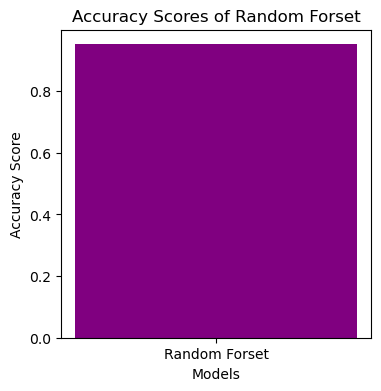

In [13]:
# Accuracy scores for random forest
accuracy_scores = [ accuracy_score(Y_test, Y_pred_rf)]

# Labels for the bars
models = [ 'Random Forset']

# Creating the bar plot
plt.figure(figsize=(4, 4))
plt.bar(models, accuracy_scores, color=['purple'])
plt.title('Accuracy Scores of Random Forset')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()


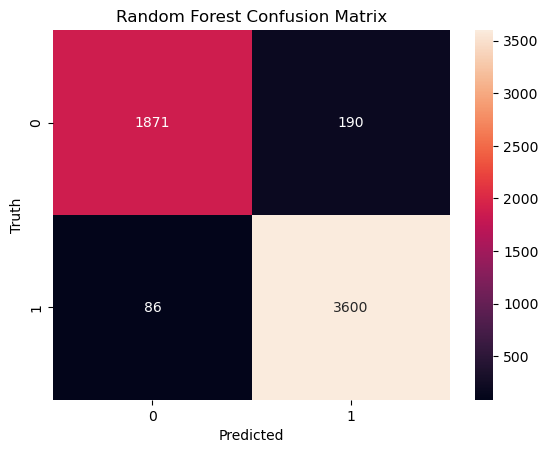

In [14]:
cm=confusion_matrix(Y_test,Y_pred_rf)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Random Forest Confusion Matrix')
plt.show()

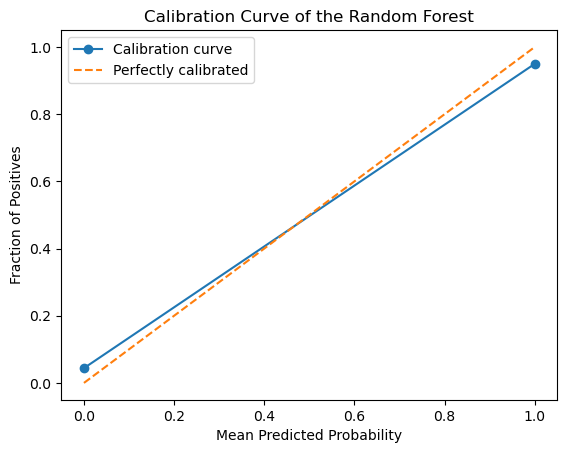

In [15]:
prob_true, prob_pred = calibration_curve(Y_test, Y_pred_rf, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve of the Random Forest')
plt.legend()
plt.show()